---
title: Homework 1
subtitle: "ME 2060: Numerical Methods"
date: 2025-01-20
venue: Homeworks
exports:
  - format: pdf
    template: arxiv_nips
    link: https://jacob-cunningham-ds.github.io/me2060/hw1-code-cunningham
    output: ../assets/hw1_cunningham.pdf
downloads:
  - file: ../assets/ME_2060_HW_1.pdf
    title: ME_2060_HW_1.pdf
  - file: ../assets/hw1_cunningham.pdf
    title: hw1_cunningham.pdf
  - file: hw1_code_cunningham.ipynb
    title: hw1_code_cunningham.ipynb
abstract: |
  Homework discussion, calculations, and answers are provided herein.
---

## Effects of roundoff and truncation errors on numerical accuracy

The one-sided finite difference scheme to approximate the first derivative of a function $f$ is defined as:

$$
\label{equ-osfd}
\begin{equation}
  f_{h}(x) = \frac{f(x + h) - f(x)}{h} \approx f'(x),
\end{equation}
$$

where $h$ is the step size if no roundoff error exists, then the accuracy of the scheme is dermined soley by **truncation error**

$$
\label{equ-truncation-error}
\begin{equation}
  t_{e}(h) = | f'(x) - f_{h}(x) | = \mathscr{O}(h),
  \quad
  f'(x) = f_{h}(x) + \mathscr{O}(h),
\end{equation}
$$

where the big $\mathscr{O}$ - notation means there exists a constant $K$ such that $\mathscr{O} < K \cdot h$ for all $h$. In the presence of roundoff errors, $x$ cannot be represented exactly; instead, it is represented by the rounded value $\tilde{x}$ with the associated roundoff error $r = |\tilde{x} - x |$.

### Part A

Show that the total error of the finite-difference approximation consists of both truncation error $t_{e}(h)$ due to the finite-difference scheme and the roundoff error $r$:

$$
\label{equ-fd-error}
\begin{equation}
  \epsilon (h) := |f'(x) - f_{h}(\tilde{x})| = \mathscr{O}(h) + \frac{r}{h}
\end{equation}
$$

**Hint**: Start from $f'(x) = f_{h}(x) + \mathscr{O}(h)$, and consider that the computation of the finite difference $f_{h}(x)$ approximation already involves roundoff errors, e.g., $f(x) = \tilde{f}(x) + r$, $f(x + h) = \tilde{f}(x) + h + r$.

___

When accounting for rounding error, the computed version of [Equation (%s)](#equ-osfd) is:

$$
\label{equ-1A-calc-1}
\begin{equation}
  \tilde{f}_{h}(x) = \frac{\tilde{f}(x + h) - \tilde{f}(x)}{h},
\end{equation}
$$

where $\tilde{f}(x + h)$ and $\tilde{f}(x)$ are the computed values of $f(x + h)$ and $f(x)$, respectively. Since the computed values are equal to the exact values plus rounding error, [Equation (%s)](#equ-1A-calc-1) can be reduced:

$$
\begin{equation*}
\begin{align*}
  \tilde{f}_{h}(x) &= \frac{(f(x + h) + r_1) - (f(x) + r_2)}{h} \\
  &= \frac{f(x + h) - f(x) + (r_1 - r_2)}{h} \\
  &= \frac{f(x + h) - f(x)}{h} + \frac{r_1 - r_2}{h} \\
  &= f_{h}(x) + \frac{r_1 - r_2}{h}
\end{align*}
\end{equation*}
$$

This can be rewritten as:

$$
\label{equ-1A-calc-2}
\begin{equation}
  \tilde{f}_h(x) = f_{h}(x) + \frac{r}{h},
\end{equation}
$$

where $r = r_1 - r_2$.

The important step here is to realize that the rounding errors at $\tilde{f}(x + h)$ and $\tilde{f}(x)$ are not necessarily the same value. Substituting [Equation (%s)](#equ-1A-calc-2) into [Equation (%s)](#equ-truncation-error) gives:

$$
\begin{equation*}
\begin{align*}
  f'(x) &= (\tilde{f}_{h}(x) - \frac{r}{h}) + \mathscr{O}(h) \\
  &= \tilde{f}_{h}(x) - \frac{r}{h} + \mathscr{O}(h)
\end{align*}
\end{equation*}
$$

Since rounding error would add error contribution the result can be rewritten as:

$$
\label{equ-1A-calc-3}
\begin{equation}
  f'(x) = \tilde{f}_{h}(x) + \frac{r}{h} + \mathscr{O}(h)
\end{equation}
$$

The difference between the exact derivative and the computed derivative using this scheme is thus:

$$
\begin{equation*}
  f'(x) - \tilde{f}_{h}(x) = \mathscr{O}(h) + \frac{r}{h}
\end{equation*}
$$

Since both error contributions are always positive:

$$
\label{equ-1A-calc-4}
\begin{equation}
  |f'(x) - \tilde{f}_{h}(x) | = \mathscr{O}(h) + \frac{r}{h},
\end{equation}
$$

which is equivalent to [Equation (%s)](#equ-fd-error).

:::{important} Answer 1A
The deriviation above shows how [Equation (%s)](#equ-osfd) can be written as [Equation (%s)](#equ-1A-calc-1) when accounting for rounding error. [Equation (%s)](#equ-1A-calc-1) was reduced to [Equation (%s)](#equ-1A-calc-2) and substituted into [Equation (%s)](#equ-truncation-error) to give [Equation (%s)](#equ-1A-calc-3) which was rearranged to [Equation (%s)](#equ-1A-calc-4) and is equivalent to [Equation (%s)](#equ-fd-error).
:::

### Part B

From Part A, what can you say about the numerical accuracy of the finite difference scheme as the step size $h$ is continually decreased?

___

:::{important} Answer 1B
The roundoff error term $r/h$ will dominate and roundoff errors will be amplified. Conversely if $h$ is increased the truncation error term will dominate. This implies that there is probably an optimal step size to balance both error terms.
:::

### Part C

The second order central difference approximation is defined as

$$
\begin{equation}
  f_{h}^{c}(x) = \frac{f(x + h) - f(x - h)}{2h} \approx f'(x)
\end{equation}
$$

and has a truncation error of $t_{e}(h) = |f'(x) - f_{h}^{c}(x) | = \mathscr{O}(h^2)$.

Within the notebook `Week2_FD_students.ipynb` available on Canvas Module 1, add a function to evaluate the finite difference approximation $f_{h}^{c}$ for the derivative of $f(x) = \sin (x)$ with step size $h$ at a fixed $x = x_0 = 1$. For the same array $h$ of step sizes as in the notebook, calculate the array consisting of errors between the finite difference approximation $f_{h}^{c}$ and the exact dervative $f'$. Plot the approximation error for the central differences scheme as a function of step size $h$. Display your plot in log format in addition to the previous plot for forward differences.

___

Let $f(x) = \sin{x}$ and $x = x_0 = 1$.

:::{code} julia
:label: code-p1C
:caption: f(x) central differences scheme forward difference scheme approximation error.

# Packages used
import Plots as plt
import LaTeXStrings as ltx

# One-sided finite difference approximation
function fh(x::Real, h::Vector{<:Real}, f::Function)
    return (f.(x .+ h) .- f.(x)) ./ h
end

# Second order central difference approximation
function fch(x::Real, h::Vector{<:Real}, f::Function)
    return (f.(x .+ h) .- f.(x .- h)) ./ (2 * h)
end

# Total error (note rounding error implicitly included)
function eps(f_exact::Real, f_num::Vector{<:Real})
        return abs.(f_exact .- f_num)
end

# Fixed x and same h array
x = 1.0
n = 1:15
h = 10.0 .^ -n

# Numerical derivatives
fh_sin = fh(x, h, sin)
fch_sin = fch(x, h, sin)

# Exact derivative
f_deriv_sin = cos(x)

# Total errors
eps_fh_sin = eps(f_deriv_sin, fh_sin)
eps_fhc_sin = eps(f_deriv_sin, fch_sin)

# Plots
plt.plot(h, eps_fh_sin,
    yaxis=:log10, xaxis=:log10,
    label="Forward Difference",
    lc=:black, lw=2, ls=:solid)

plt.plot!(h, eps_fhc_sin,
    label="Central Difference",
    lc=:black, lw=2, ls=:dash)

plt.plot!(legend=:bottomleft)
plt.title!(ltx.L"Numerical Error $\epsilon (h)$ vs. Step Size $h$")
plt.xlabel!(ltx.L"\log h")
plt.ylabel!(ltx.L"\log\epsilon (h)")
plt.annotate!(1e-13, 1e-9, ltx.L"$f(x) = \sin(x)$")
:::

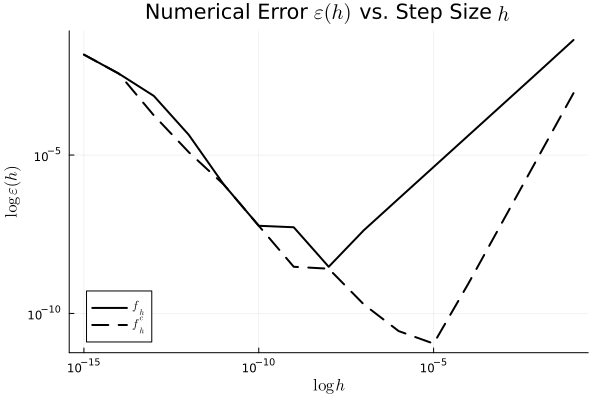

In [1]:
# Packages used
import Plots as plt
import LaTeXStrings as ltx

# One-sided finite difference approximation
function fh(x::Real, h::Vector{<:Real}, f::Function)
    return (f.(x .+ h) .- f.(x)) ./ h
end

# Second order central difference approximation
function fch(x::Real, h::Vector{<:Real}, f::Function)
    return (f.(x .+ h) .- f.(x .- h)) ./ (2 * h)
end

# Total error (note rounding error implicitly included)
function ϵ(f_exact::Real, f_num::Vector{<:Real})
        return abs.(f_exact .- f_num)
end

# Fixed x and same h array
x = 1.0
n = 1:15
h = 10.0 .^ -n

# Numerical derivatives
fh_sin = fh(x, h, sin)
fch_sin = fch(x, h, sin)

# Exact derivative
f_deriv_sin = cos(x)

# Total errors
ϵ_fh_sin = ϵ(f_deriv_sin, fh_sin)
ϵ_fch_sin = ϵ(f_deriv_sin, fch_sin)

# Plots
plt.plot(h, ϵ_fh_sin,
    yaxis=:log10, xaxis=:log10,
    label=ltx.L"f_{h}",
    lc=:black, lw=2, ls=:solid)

plt.plot!(h, ϵ_fch_sin,
    label=ltx.L"f^{c}_{h}",
    lc=:black, lw=2, ls=:dash)

plt.plot!(legend=:bottomleft)
plt.title!(ltx.L"Numerical Error $\epsilon (h)$ vs. Step Size $h$")
plt.xlabel!(ltx.L"$\log h$")
plt.ylabel!(ltx.L"$\log\epsilon (h)$")

The code to produce this plot is provided in [](#code-p1C).

:::{important} Answer 1C
The figure above shows that the central difference scheme is superior to the forward difference scheme.
:::

### Part D

Now repeat the same above steps for the function $g(x) = \sin (100x)$ and its derivative $g'(x)$. Add your plots for the forward difference and central difference numerical errors to the same plot. Make sure to use a different linestyle, and specify your legend entries. Looking at your plot, what can you say about the accuracy of each method to approximate the derivative for $\sin (x)$ and $\sin (100x)$ at $x_{0} = 1$? Can you explain why?

___

Let $g(x) = \sin(100 x)$ and $x = x_0 = 1$.

:::{code} julia
:label: code-p1D
:caption: f(x) and g(x) central differences scheme forward difference scheme approximation error.

# New function to evaluate
g(x::Real) = sin(100*x)

# Numerical derivatives
fh_g = fh(x, h, g)
fch_g = fch(x, h, g)

# Exact derivative
g_deriv = 100 * cos(x)

# Total errors
ϵ_fh_g = ϵ(g_deriv, fh_g)
ϵ_fch_g = ϵ(g_deriv, fch_g)

# Plots
plt.plot!(h, ϵ_fh_g,
    label=ltx.L"g_{h}",
    lc=:red, lw=2, ls=:solid)

plt.plot!(h, ϵ_fch_g,
    label=ltx.L"g^{c}_{h}",
    lc=:red, lw=2, ls=:dash)
:::

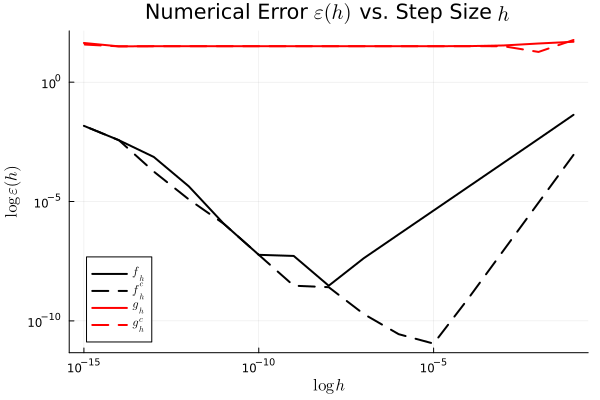

In [2]:
# New function to evaluate
g(x::Real) = sin(100*x)

# Numerical derivatives
fh_g = fh(x, h, g)
fch_g = fch(x, h, g)

# Exact derivative
g_deriv = 100 * cos(x)

# Total errors
ϵ_fh_g = ϵ(g_deriv, fh_g)
ϵ_fch_g = ϵ(g_deriv, fch_g)

# Plots
plt.plot!(h, ϵ_fh_g,
    label=ltx.L"g_{h}",
    lc=:red, lw=2, ls=:solid)

plt.plot!(h, ϵ_fch_g,
    label=ltx.L"g^{c}_{h}",
    lc=:red, lw=2, ls=:dash)

The code to produce this plot is provided in [](#code-p1D).

:::{important} Answer 1D
The central differences scheme is more accurate in both cases and this is due to the fact that the central difference scheme converges faster opposed to the forward differences scheme. So as the step size is decreased, the central differences scheme truncation error decreases quadratically while the forward differences scheme decreases linearly. Both schemes are affected by roundoff error as the step size is decreased.

For low frequency functions, e.g., $f(x)$, both methods performed well. There is a U-shaped curve defining the total error which makes sense since at lower step sizes round-off errors would dominate and then at higher step sizes truncation error would dominate.

For high frequency functions, e.g., $g(x)$, both methods struggle because the high frequency amplifies the truncation error.
:::

## Errors in Scientific Computing

The sine function is given by the infinite series

$$
\begin{equation}
  \sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} -\frac{x^7}{7!} + \cdots
\end{equation}
$$

### Part A

Calculate the forward and backward errors if we approximate the sine function by using only the first term in the series for $x = 0.1, \; 0.5, \; 1.0$.

___

Let $f(x) = \sin{x}$. The numerical approximation of $f(x)$ using the first term is defined as:

$$
\begin{equation*}
  \tilde{f}(x) = x
\end{equation*}
$$

The forward error is found from:

$$
\label{equ-forward-error}
\begin{equation}
  \epsilon_{f} = \tilde{f}(x) - f(x)
\end{equation}
$$

The backward error is found from:

$$
\label{equ-backward-error}
\begin{equation}
  \epsilon_{b} = \tilde{x} - x \; \ni \tilde{f}(x) = f(\tilde{x})
\end{equation}
$$

For this first order approximation of $\sin{x}$, $\tilde{x}$ is found as follows:

$$
\begin{equation*}
\begin{align*}
  \tilde{f}(x) &= f(\tilde{x}) \\
  x &= \sin(\tilde{x}) \\
  \arcsin(x) &= \tilde{x}
\end{align*}
\end{equation*}
$$

:::{code} julia
:label: code-p2A
:caption: Forward and backward error for $f(x) = \sin{x}$, $\tilde{f}(x) = x$, and $x = 0.1,\; 0.5,\; 1.0$.

# Packages used
using Printf
import DataFrames as dfs

# Generic forward error function
function ϵ_f(f_num::Function, f_exact::Function, x::Real)
    return f_num(x) - f_exact(x)
end

# Generic backward error function
function ϵ_b(x_num::Real, x_exact::Real)
    return x_num - x_exact
end

# Approx x solver for first order approximation of sin(x) = x
function x_num_1(x::Real)
    return asin(x)
end

# Given exact x values
x_exact = [0.1, 0.5, 1.0]

# Given first order approximation
f_num(x::Real) = x

# Initialize lists
x_list = []
f_x_list = []
f_x_approx_list = []
x_approx_list = []
err_f_list = []
err_b_list = []

# Loop over the given exact x values to find forward and backward error
for x in x_exact
    # Update lists
    push!(x_list, x)
    push!(x_approx_list, x_num_1(x))
    push!(f_x_list, sin(x))
    push!(f_x_approx_list, f_num(x))
    push!(err_f_list ,ϵ_f(f_num, sin, x))
    push!(err_b_list, ϵ_b(x_num_1(x), x))
end

# Make a dataframe for presentation purposes
data = Dict(
    :"x" => round.(Vector{Float64}(x_list), digits=2),
    :"f(x)" => round.(Vector{Float64}(f_x_list), digits=6),
    :"Approx f(x)" => round.(Vector{Float64}(f_x_approx_list), digits=6),
    :"Approx x" => round.(Vector{Float64}(x_approx_list), digits=6),
    :"Forward Error" => round.(Vector{Float64}(err_f_list), digits=6),
    :"Backward Error" => round.(Vector{Float64}(err_b_list), digits=6)
    )

df = dfs.DataFrame(data)
df = dfs.select(df, [:"x", :"Approx x", :"f(x)",
        :"Approx f(x)", :"Forward Error", :"Backward Error"])
dfs.display(df)
:::

In [83]:
# Packages used
import DataFrames as dfs

# Generic forward error function
function ϵ_f(f_num::Function, f_exact::Function, x::Real)
    return f_num(x) - f_exact(x)
end

# Generic backward error function
function ϵ_b(x_num::Real, x_exact::Real)
    return x_num - x_exact
end

# Approx x solver for first order approximation of sin(x) = x
function x_num_1(x::Real)
    return asin(x)
end

# Given exact x values
x_exact = [0.1, 0.5, 1.0]

# Given first order approximation
f_num(x::Real) = x

# Initialize lists
x_list = []
f_x_list = []
f_x_approx_list = []
x_approx_list = []
err_f_list = []
err_b_list = []

# Loop over the given exact x values to find forward and backward error
for x in x_exact
    # Update lists
    push!(x_list, x)
    push!(x_approx_list, x_num_1(x))
    push!(f_x_list, sin(x))
    push!(f_x_approx_list, f_num(x))
    push!(err_f_list ,ϵ_f(f_num, sin, x))
    push!(err_b_list, ϵ_b(x_num_1(x), x))
end

# Make a dataframe for presentation purposes
data = Dict(
    :"x" => round.(Vector{Float64}(x_list), digits=2),
    :"f(x)" => round.(Vector{Float64}(f_x_list), digits=6),
    :"Approx f(x)" => round.(Vector{Float64}(f_x_approx_list), digits=6),
    :"Approx x" => round.(Vector{Float64}(x_approx_list), digits=6),
    :"Forward Error" => round.(Vector{Float64}(err_f_list), digits=6),
    :"Backward Error" => round.(Vector{Float64}(err_b_list), digits=6)
    )

df = dfs.DataFrame(data)
df = dfs.select(df, [:"x", :"Approx x", :"f(x)",
        :"Approx f(x)", :"Forward Error", :"Backward Error"])
dfs.display(df)

Row,x,Approx x,f(x),Approx f(x),Forward Error,Backward Error
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.1,0.100167,0.099833,0.1,0.000167,0.000167
2,0.5,0.523599,0.479426,0.5,0.020574,0.023599
3,1.0,1.5708,0.841471,1.0,0.158529,0.570796


The code to produce the table above is provided in [](#code-p2A).

:::{important} Answer 2A
For this first order approximation of $\sin{x}$:
- The forward error and backward error at x = {eval}`df.x[1]` is {eval}`df."Forward Error"[1]` and {eval}`df."Backward Error"[1]`, respectively.
- The forward error and backward error at x = {eval}`df.x[2]` is {eval}`df."Forward Error"[2]` and {eval}`df."Backward Error"[2]`, respectively.
- The forward error and backward error at x = {eval}`df.x[3]` is {eval}`df."Forward Error"[3]` and {eval}`df."Backward Error"[3]`, respectively. 
:::

### Part B

Calculate the forward and backward errors if we approximate the sine function by using only the first two terms in the series for $x = 0.1, \; 0.5, \; 1.0$.

___

The numerical approximation of $f(x) = \sin{x}$ using the first two terms is defined as:

$$
\begin{equation*}
  \tilde{f}(x) = x - \frac{x^3}{3!}
\end{equation*}
$$

The forward error can be found from [Equation (%s)](#equ-forward-error), and the backward error can be found from [Equation (%s)](#equ-backward-error).

For this second order approximation of $\sin{x}$, $\tilde{x}$ is found as follows:

$$
\begin{equation*}
\begin{align*}
  \tilde{f}(x) &= f(\tilde{x}) \\
  x - \frac{x^3}{3!} &= \sin(\tilde{x}) \\
  \arcsin(x - \frac{x^3}{3!}) &= \tilde{x}
\end{align*}
\end{equation*}
$$

:::{code} julia
:label: code-p2B
:caption: Forward and backward error for $f(x) = \sin{x}$, $\tilde{f}(x) = x + x^3 / 3!$, and $x = 0.1,\; 0.5,\; 1.0$.

# Approx x solver for first order approximation of sin(x) = x
function x_num_2(x::Real)
    return asin(clamp(x + (x^3 / factorial(3)), -1, 1))
end

# Given exact x values
x_exact = [0.1, 0.5, 1.0]

# Given second order approximation
f_num(x::Real) = x + (x^3 / factorial(3))

# Initialize lists
x_list = []
f_x_list = []
f_x_approx_list = []
x_approx_list = []
err_f_list = []
err_b_list = []

# Loop over the given exact x values to find forward and backward error
for x in x_exact
    # Update lists
    push!(x_list, x)
    push!(x_approx_list, x_num_2(x))
    push!(f_x_list, sin(x))
    push!(f_x_approx_list, f_num(x))
    push!(err_f_list ,ϵ_f(f_num, sin, x))
    push!(err_b_list, ϵ_b(x_num_2(x), x))
end

# Make a dataframe for presentation purposes
data = Dict(
    :"x" => round.(Vector{Float64}(x_list), digits=2),
    :"f(x)" => round.(Vector{Float64}(f_x_list), digits=6),
    :"Approx f(x)" => round.(Vector{Float64}(f_x_approx_list), digits=6),
    :"Approx x" => round.(Vector{Float64}(x_approx_list), digits=6),
    :"Forward Error" => round.(Vector{Float64}(err_f_list), digits=6),
    :"Backward Error" => round.(Vector{Float64}(err_b_list), digits=6)
    )

df = dfs.DataFrame(data)
df = dfs.select(df, [:"x", :"Approx x", :"f(x)",
        :"Approx f(x)", :"Forward Error", :"Backward Error"])
dfs.display(df)
:::

In [82]:
# Approx x solver for first order approximation of sin(x) = x
function x_num_2(x::Real)
    return asin(clamp(x + (x^3 / factorial(3)), -1, 1))
end

# Given exact x values
x_exact = [0.1, 0.5, 1.0]

# Given second order approximation
f_num(x::Real) = x + (x^3 / factorial(3))

# Initialize lists
x_list = []
f_x_list = []
f_x_approx_list = []
x_approx_list = []
err_f_list = []
err_b_list = []

# Loop over the given exact x values to find forward and backward error
for x in x_exact
    # Update lists
    push!(x_list, x)
    push!(x_approx_list, x_num_2(x))
    push!(f_x_list, sin(x))
    push!(f_x_approx_list, f_num(x))
    push!(err_f_list ,ϵ_f(f_num, sin, x))
    push!(err_b_list, ϵ_b(x_num_2(x), x))
end

# Make a dataframe for presentation purposes
data = Dict(
    :"x" => round.(Vector{Float64}(x_list), digits=2),
    :"f(x)" => round.(Vector{Float64}(f_x_list), digits=6),
    :"Approx f(x)" => round.(Vector{Float64}(f_x_approx_list), digits=6),
    :"Approx x" => round.(Vector{Float64}(x_approx_list), digits=6),
    :"Forward Error" => round.(Vector{Float64}(err_f_list), digits=6),
    :"Backward Error" => round.(Vector{Float64}(err_b_list), digits=6)
    )

df = dfs.DataFrame(data)
df = dfs.select(df, [:"x", :"Approx x", :"f(x)",
        :"Approx f(x)", :"Forward Error", :"Backward Error"])
dfs.display(df)

Row,x,Approx x,f(x),Approx f(x),Forward Error,Backward Error
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.1,0.100335,0.099833,0.100167,0.000333,0.000335
2,0.5,0.547827,0.479426,0.520833,0.041408,0.047827
3,1.0,1.5708,0.841471,1.16667,0.325196,0.570796


The code to produce the table above is provided in [](#code-p2B).

:::{important} Answer 2B
Answer goes here.
:::

## Condition Number & Stability

This is Exercise 1 from Section 1.4, page 26 of @driscoll. Exercises are also available at the end of each section of a chapter in the online textbook. Refer to your textbook for cross-referenced equations and tables.

Consider the formulas

$$
\begin{equation}
  f(x) = \frac{1 - \cos x}{\sin x},
  \quad
  g(x) = \frac{2 \sin^2 x/2}{\sin x},
\end{equation}
$$

which are mathematically equivalent, but they suggest evaluation alrogirthms that can behave quite differently in floating point arithmetic.

### Part A

Using (1.2.6), find the relative condition number of $f$. Note that because $f$ & $g$ are mathematically equivalent, their condition numbers are the same. Show that the condition number approaches to $1$ as $x \to 0$, which means it is possible to compute the function accurately near zero.

:::{important} Answer 3A
Answer goes here.
:::

### Part B

Compute $f(10^{-6})$ using a sequence of four elementary operations. Using Table 1.1 on page 13, make a table like the one shown in Demo 1.4.1 in the book that shows the result of each elementary result and the numerical value of the condition number of that step.

:::{important} Answer 3B
Answer goes here.
:::

### Part C

Repeat Part B for $g(10^{-6})$, which has six elementary steps.

:::{important} Answer 3C
Answer goes here.
:::

### Part D

Based on your answers to Part B & C, is $f(10^{-6})$ or $g(10^{-6})$ more accurate (provide your answer as Markdown text in your Jupyter notebook)?

:::{important} Answer 3D
Answer goes here.
:::

## Floating Point Arithmetic

Create an example calculation to demonstrate that floating point addition is not associative. Repeat the exercise for floating point multiplication.

:::{important} Answer 4
Answer goes here.
:::